In [3]:
!pip install networkx



[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from wordcloud import WordCloud
import networkx as nx

In [5]:
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:
# Min-Max
scaler = MinMaxScaler()
df_mm = pd.DataFrame(scaler.fit_transform(df.iloc[:, :4]), columns=df.columns[:4])
df_mm['species'] = df['species']

# Z-Score
scaler = StandardScaler()
df_z = pd.DataFrame(scaler.fit_transform(df.iloc[:, :4]), columns=df.columns[:4])
df_z['species'] = df['species']

df_mm.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,0.222222,0.625000,0.067797,0.041667,setosa
1,0.166667,0.416667,0.067797,0.041667,setosa
2,0.111111,0.500000,0.050847,0.041667,setosa
3,0.083333,0.458333,0.084746,0.041667,setosa
4,0.194444,0.666667,0.067797,0.041667,setosa


In [10]:
import pandas as pd
from sklearn.datasets import load_iris

# Load dataset
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

# 1. Rename columns (with print verification)
df = df.rename(columns={
    'sepal length (cm)': 'sepal_length',
    'sepal width (cm)': 'sepal_width',
    'petal length (cm)': 'petal_length',
    'petal width (cm)': 'petal_width'
})

print("--- Column Names After Renaming ---")
print(df.columns.tolist())  # Verify new column names
print("\n--- First 5 Rows ---")
print(df.head())  # Show sample data

# 2. Apply Binning (with explicit output)
df['sepal_width_bin'] = pd.cut(df['sepal_width'], bins=3, labels=['Low', 'Medium', 'High'])
df['petal_length_bin'] = pd.qcut(df['petal_length'], q=3, labels=['Short', 'Medium', 'Long'])

print("\n--- Binning Results ---")
print(df[['sepal_width', 'sepal_width_bin', 'petal_length', 'petal_length_bin']].head())

--- Column Names After Renaming ---
['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

--- First 5 Rows ---
   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

--- Binning Results ---
   sepal_width sepal_width_bin  petal_length petal_length_bin
0          3.5          Medium           1.4            Short
1          3.0          Medium           1.4            Short
2          3.2          Medium           1.3            Short
3          3.1          Medium           1.5            Short
4          3.6          Medium           1.4            Short


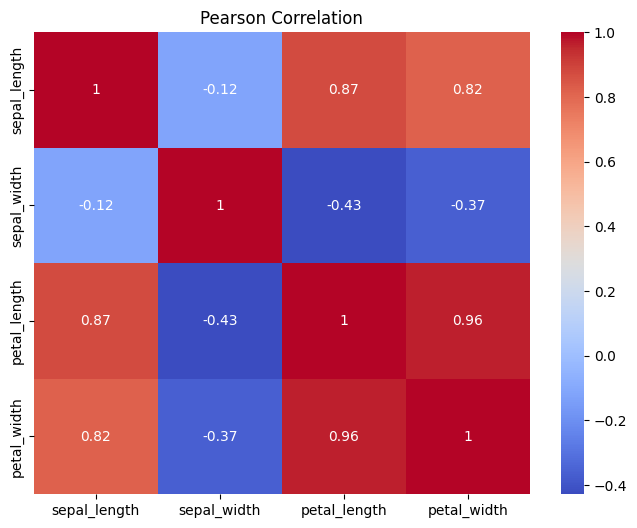

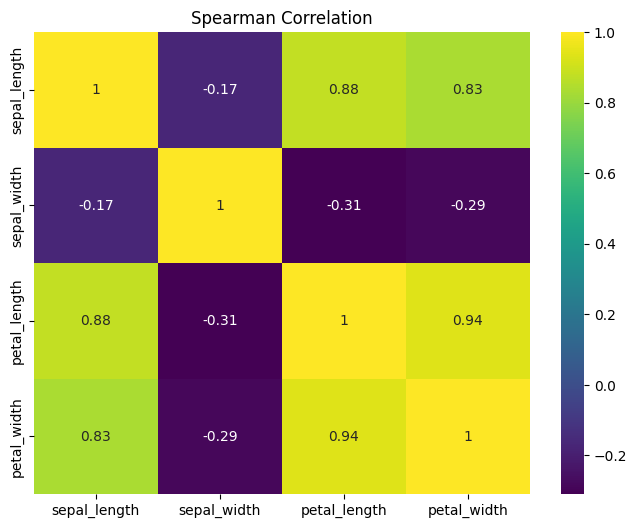

In [11]:
# Pearson
plt.figure(figsize=(8, 6))
sns.heatmap(df.iloc[:, :4].corr(method='pearson'), annot=True, cmap='coolwarm')
plt.title('Pearson Correlation')
plt.savefig('assets/pearson_corr.png')
plt.show()

# Spearman
plt.figure(figsize=(8, 6))
sns.heatmap(df.iloc[:, :4].corr(method='spearman'), annot=True, cmap='viridis')
plt.title('Spearman Correlation')
plt.savefig('assets/spearman_corr.png')
plt.show()

In [12]:
# Simulate feature relationships
adj_matrix = np.array([
    [0, 1, 1, 0],  # sepal length -> sepal width, petal length
    [1, 0, 0, 1],  # sepal width -> sepal length, petal width
    [0, 0, 0, 1],  # petal length -> petal width
    [0, 0, 0, 0]   # petal width -> none
])
G = nx.DiGraph(adj_matrix)
pagerank = nx.pagerank(G, alpha=0.9)

print("PageRank Scores:")
for idx, score in enumerate(pagerank.values()):
    print(f"{df.columns[idx]}: {score:.4f}")

PageRank Scores:
sepal_length: 0.2041
sepal_width: 0.2041
petal_length: 0.2041
petal_width: 0.3878


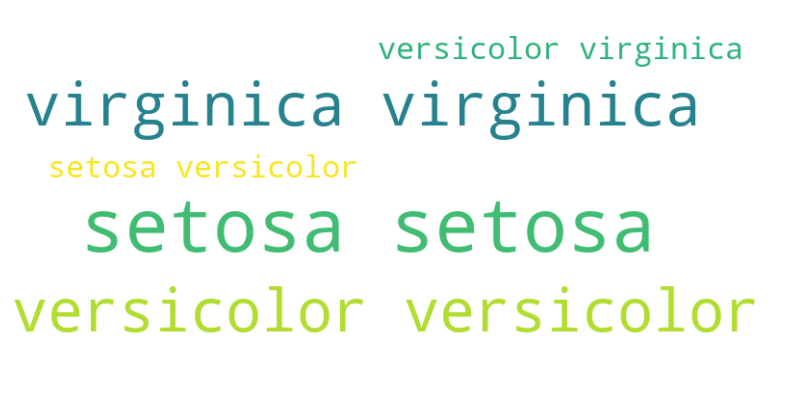

In [13]:
text = " ".join(df['species'].astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.savefig('assets/species_wordcloud.png')
plt.show()